In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from termcolor import colored
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import boston_housing
from model import def_model


/Users/J/anaconda/envs/dlnd/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Boston Area Housing Data

#### x_train
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per 10,000's
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of African Americans by town
13. LSTAT    percent lower status of the population

#### y_train
MEDV     Median value of owner-occupied homes in 1000's

In [2]:
def show_shapes(x_train, y_train, x_test, y_test, color='green'):
    print(colored('Training shape:', color, attrs=['bold']))
    print('  x_train.shape:', x_train.shape)
    print('  y_train.shape:', y_train.shape)
    print(colored('\nTesting shape:', color, attrs=['bold']))
    print('  x_test.shape:', x_test.shape)
    print('  y_test.shape:', y_test.shape)

def show_sample(x_train, y_train, idx=0, color='blue'):
    print(colored('x_train sample:', color, attrs=['bold']))
    print(x_train[idx])
    print(colored('\ny_train sample:', color, attrs=['bold']))
    print(y_train[idx])

In [3]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()


In [4]:
show_shapes(x_train, y_train, x_test, y_test)

print('\n******************************\n')

show_sample(x_train, y_train)

Training shape:
  x_train.shape: (404, 13)
  y_train.shape: (404,)

Testing shape:
  x_test.shape: (102, 13)
  y_test.shape: (102,)

******************************

x_train sample:
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]

y_train sample:
15.2


In [5]:
# Model definition
model = def_model()

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                700       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


Train on 282 samples, validate on 122 samples
Epoch 1/1000
 - 0s - loss: 523.8931 - mean_squared_error: 523.8931 - val_loss: 566.2313 - val_mean_squared_error: 566.2313

Epoch 00001: val_loss improved from inf to 566.23129, saving model to model.h5
Epoch 2/1000
 - 0s - loss: 442.3239 - mean_squared_error: 442.3239 - val_loss: 455.0458 - val_mean_squared_error: 455.0458

Epoch 00002: val_loss improved from 566.23129 to 455.04578, saving model to model.h5
Epoch 3/1000
 - 0s - loss: 319.4903 - mean_squared_error: 319.4903 - val_loss: 296.1450 - val_mean_squared_error: 296.1450

Epoch 00003: val_loss improved from 455.04578 to 296.14505, saving model to model.h5
Epoch 4/1000
 - 0s - loss: 178.8710 - mean_squared_error: 178.8710 - val_loss: 166.9620 - val_mean_squared_error: 166.9620

Epoch 00004: val_loss improved from 296.14505 to 166.96199, saving model to model.h5
Epoch 5/1000
 - 0s - loss: 130.0439 - mean_squared_error: 130.0439 - val_loss: 160.0343 - val_mean_squared_error: 160.0343



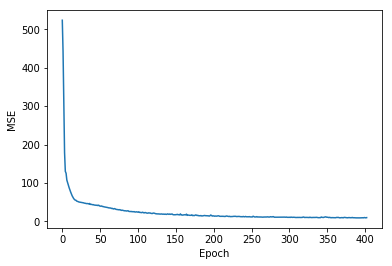

In [7]:
checkpointer = ModelCheckpoint(filepath="model.h5", verbose=1, save_best_only=True)
earlystopping = EarlyStopping(patience=50)

history = model.fit(x_train,
                    y_train,
                    epochs=1000,
                    batch_size=32, 
                    validation_split=0.3,
                    verbose=2,
                    callbacks=[earlystopping,checkpointer])



# plot metrics
plt.plot(history.history['mean_squared_error'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

In [8]:
model.load_weights("model.h5")
score = model.predict(x_test)

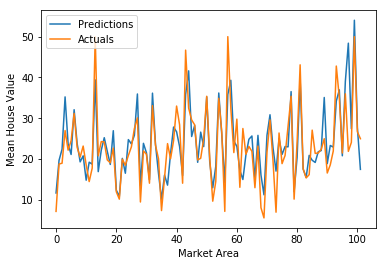

In [9]:
# Predict for test data
plt.plot(score, label='Predictions')
plt.plot(y_test, label='Actuals')
plt.legend()
plt.ylabel('Mean House Value')
plt.xlabel('Market Area')
plt.show()

In [19]:
# Replicate the model for production
model2 = def_model()
model2.load_weights("model.h5")
score2 = model2.predict(x_test)

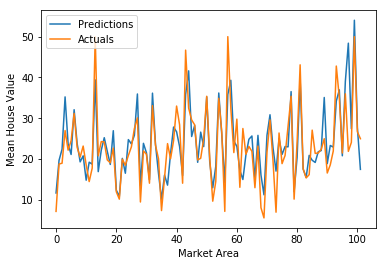

In [20]:
# Predict for test data
plt.plot(score2, label='Predictions')
plt.plot(y_test, label='Actuals')
plt.legend()
plt.ylabel('Mean House Value')
plt.xlabel('Market Area')
plt.show()

In [46]:
testSample=np.array([1.23247, 0., 8.14, 0., 0.538, 6.142, 91.7, 3.9769, 4., 307., 21., 396.9, 18.72])

testSample = testSample.reshape(1,13)

result=model2.predict(testSample)
print(result)


[[18.399906]]
